In [2]:
# Import libraries and dependencies for SQLalchemy

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float, Date
from sqlalchemy import inspect, func, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
Base = automap_base()

import datetime as datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Retrieve engine, connection and declare a Base from what was being passed into the prior classes that were made

engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
# Print all of the classes mapped to the Base

Base.classes.keys()

['measurements', 'station']

In [5]:
inspector = inspect(engine)

inspector.get_table_names()

['measurements', 'station']

In [6]:
engine.execute("SELECT * FROM measurements LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [7]:
# Reflect Database into ORM class
Station = Base.classes.station
Measurements = Base.classes.measurements

In [8]:
# Start a session to query the database
session = Session(engine)

### Precipitation Analysis

In [9]:
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_date

('2017-08-23')

In [10]:
days = 365
last_year = datetime.date(2017,8,23) - datetime.timedelta(days)
print(last_year)

2016-08-23


In [11]:
precipitation = session.query(Measurements.date, Measurements.prcp).\
                filter(Measurements.date > last_year).\
                order_by(Measurements.date).all()

In [12]:
precip_df = pd.DataFrame(precipitation)
precip_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


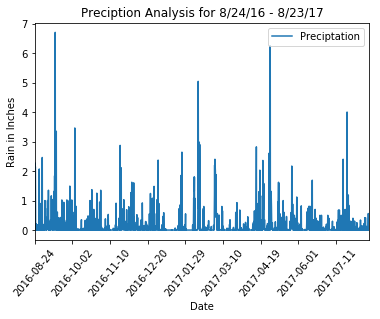

In [13]:
precip_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Preciption Analysis for 8/24/16 - 8/23/17")
plt.legend(["Preciptation"])
plt.xticks(rotation = 50)
gridlines = True
plt.show()

In [14]:
precip_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [15]:
stations_query = session.query(Measurements).group_by(Measurements.station).count()
print("There are " + str(stations_query) + " stations.")

There are 9 stations.


In [16]:
busiest_station = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).\
                  order_by(func.count(Measurements.tobs).desc()).all()

busiest = busiest_station[0][0]

print("The busiest station was " + str(busiest) + " with " + str(busiest_station[0][1]) + " weather observations" )
    
print(" ")
    
print(busiest_station)
for station, count in busiest_station:
    print("Station",station,"had",count,"weather observations")

The busiest station was USC00519281 with 2772 weather observations
 
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
Station USC00519281 had 2772 weather observations
Station USC00519397 had 2724 weather observations
Station USC00513117 had 2709 weather observations
Station USC00519523 had 2669 weather observations
Station USC00516128 had 2612 weather observations
Station USC00514830 had 2202 weather observations
Station USC00511918 had 1979 weather observations
Station USC00517948 had 1372 weather observations
Station USC00518838 had 511 weather observations


In [19]:
temp_df = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
       filter(Measurements.station == busiest).\
       filter(Measurements.date > last_year).\
       order_by(Measurements.date).all()

temp_df = pd.DataFrame(temp_df)

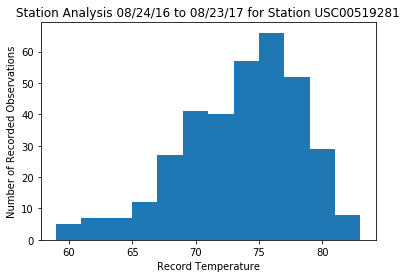

In [20]:
plt.hist(temp_df['tobs'], 12)
plt.xlabel("Record Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis 08/24/16 to 08/23/17 for Station " + busiest)
plt.show()

### Temperature Analysis

In [28]:
def calc_temps(start_date,end_date):
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs),func.max(Measurements.tobs)).\
           filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    
print(calc_temps('2012-02-08', '2012-03-05'))

[(56, 69.62559241706161, 78)]


In [32]:
trip_arrive = datetime.date(2018, 5, 5)
trip_leave = datetime.date(2018, 5, 12)
last_year = datetime.timedelta(days = 365)
temp_avg_1st_year = calc_temps((trip_arrive - last_year), (trip_leave - last_year))
print(temp_avg_1st_year)

[(66, 75.24444444444444, 80)]


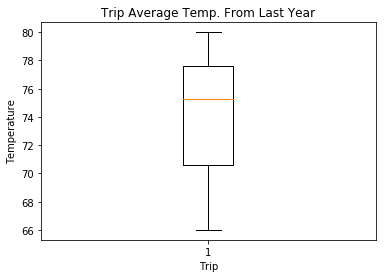

In [40]:
fig, ax = plt.subplots()
x = range(len(temp_avg_1st_year))
ax.boxplot(temp_avg_1st_year)
ax.set_title("Trip Average Temp. From Last Year")
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")

plt.show()